# Cross validation


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Rozważmy następujący zbiór punktów:

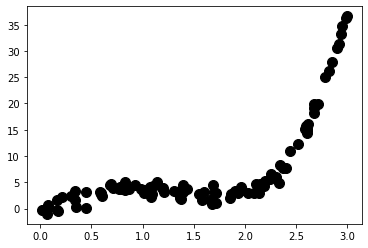

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.9).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i oceń wyniki na części testowej.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50,) (50,)
(50,) (50,)


In [19]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [20]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 3.08938371e+00,  1.32764565e+01,  8.56740182e-01,  1.69845939e+01,
       -7.75167896e-02,  5.37327003e+00,  9.51033898e-02,  9.74164682e-01,
        2.50489011e+00,  2.50637582e+01,  2.59994670e+00,  8.75826356e+00,
       -6.85978749e-02,  2.08239578e-01,  2.52582051e-02,  7.22676700e+00,
        1.06672779e+00,  1.07839168e+00,  9.11744940e-01,  1.04251615e+01,
        3.29804803e+00,  5.08677122e-01,  8.86373627e+00,  2.32069515e+00,
       -6.72854180e-03,  2.41780620e+01,  5.29735534e+00,  1.38639923e+01,
        2.28378618e+01,  8.77164551e-01,  2.42394180e+00,  1.88258154e+01,
        8.92416058e-01,  5.04281596e+00,  2.61352471e+00,  6.43414087e+00,
        6.35397827e-01,  5.22750665e+00,  2.65492462e+01,  8.97180698e-01,
        1.80027973e+00,  1.27068396e+00,  9.48249064e+00,  5.87769861e+00,
        9.23004043e-01,  1.38888021e-01,  1.88672906e+01,  2.22676810e+01,
        1.06491377e+01,  3.96924106e-01])

In [21]:
from sklearn import  metrics
print("R^2: {}".format(metrics.r2_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

R^2: 0.8110364085974705
Explained variance score: 0.8130292176500205
Median absolute error: 3.0043029919833364
Mean squared error: 15.30264384703354
Mean absolute errors: 3.3424320456519627


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [23]:
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR10', make_pipeline(PolynomialFeatures(10), linear_model.LinearRegression()) ))
models.append(('PR15', make_pipeline(PolynomialFeatures(15), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
#     print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
#     print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
#     print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Train mean squared error: {}".format( metrics.mean_squared_error(y_train, model.predict(X_train)) ))
    print("Test mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
#     print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))

LR
Train mean squared error: 35.597537332445945
Test mean squared error: 36.83790333807012
PR2
Train mean squared error: 15.681007032926868
Test mean squared error: 15.30264384703354
PR5
Train mean squared error: 0.8499961398441647
Test mean squared error: 0.6493360970378547
PR10
Train mean squared error: 0.7242999140608077
Test mean squared error: 0.7593385565620744
PR15
Train mean squared error: 0.5771531878102383
Test mean squared error: 5.013323170268938
PR25
Train mean squared error: 0.5163773209708975
Test mean squared error: 6.077425175592875
